# Importing libraries 

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

In [2]:
# load data
data = pd.read_csv('/kaggle/input/bank-customer-churn/Customer-Churn-Records.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [3]:
# dimension of data
data.shape

(10000, 18)

In [4]:
# check data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [5]:
# check dupicats values in data
data.duplicated().sum()

0

In [6]:
# drop unnecessary columns
data.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [7]:
# statistics of data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203800,0.402842,0.00,0.00,0.000,0.0000,1.00
Complain,10000.0,0.204400,0.403283,0.00,0.00,0.000,0.0000,1.00


# EDA - exploratory data analysis

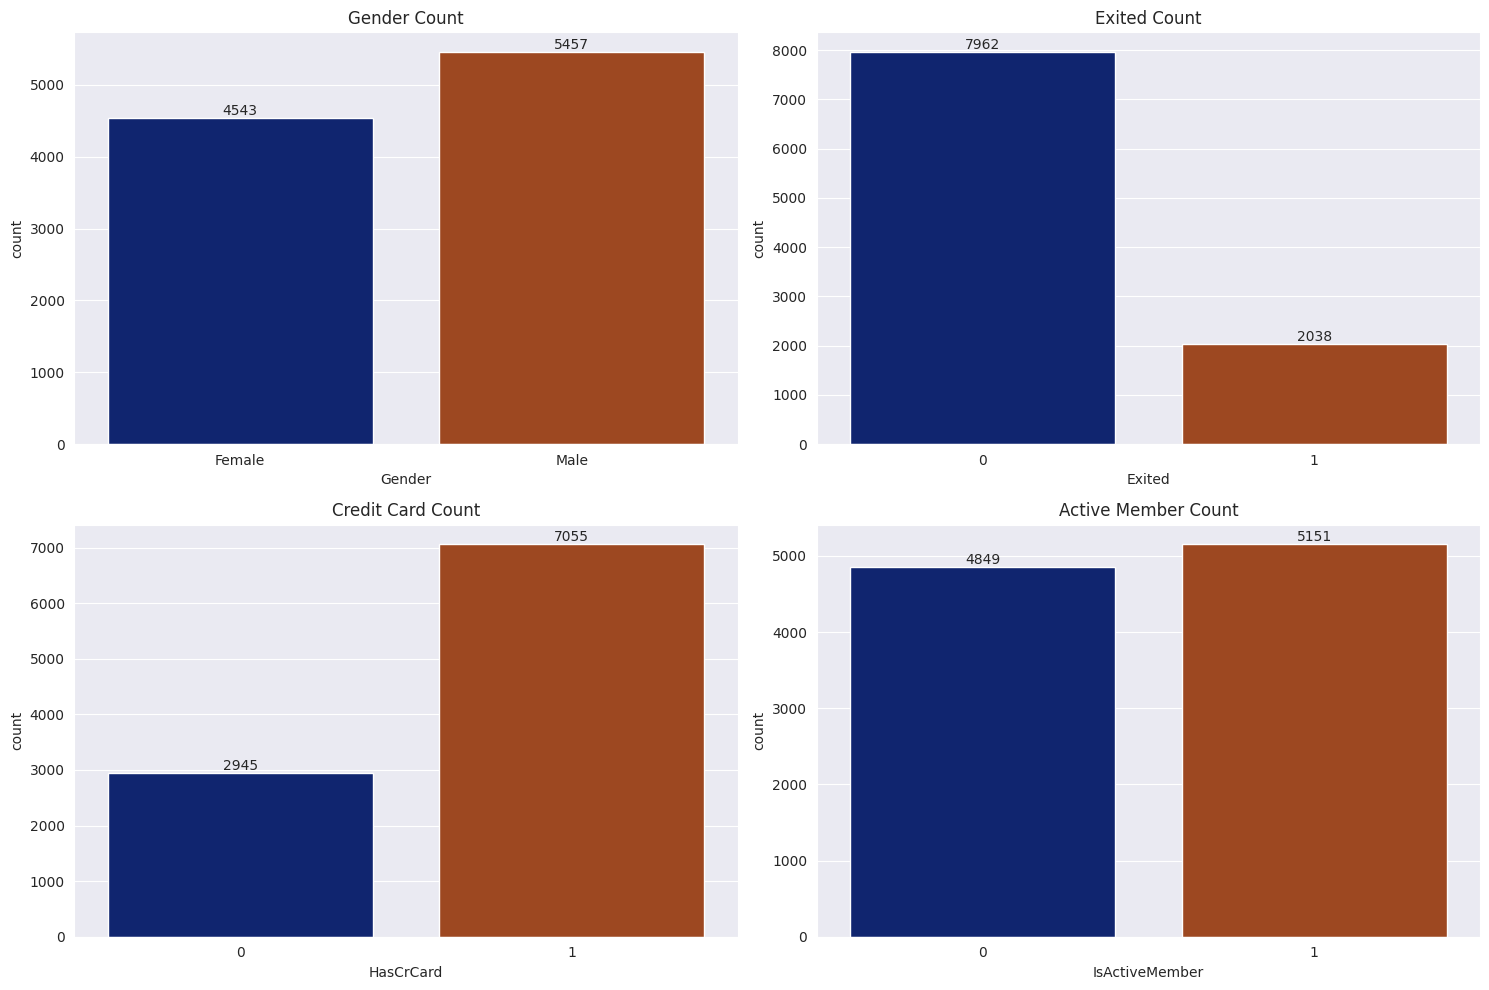

In [8]:
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(15,10))

ax = sns.countplot(data=data,x='Gender',ax=axes[0,0],palette='dark')
for bars in ax.containers:
    ax.bar_label(bars)
axes[0,0].set_title('Gender Count')

ax = sns.countplot(data=data,x='Exited',ax=axes[0,1],palette='dark')
for bars in ax.containers:
    ax.bar_label(bars)
axes[0,1].set_title('Exited Count')

ax = sns.countplot(data=data,x='HasCrCard',ax=axes[1,0],palette='dark')
for bars in ax.containers:
    ax.bar_label(bars)
axes[1,0].set_title('Credit Card Count')

ax = sns.countplot(data=data,x='IsActiveMember',ax=axes[1,1],palette='dark')
for bars in ax.containers:
    ax.bar_label(bars)
axes[1,1].set_title('Active Member Count')

plt.tight_layout()
plt.show()

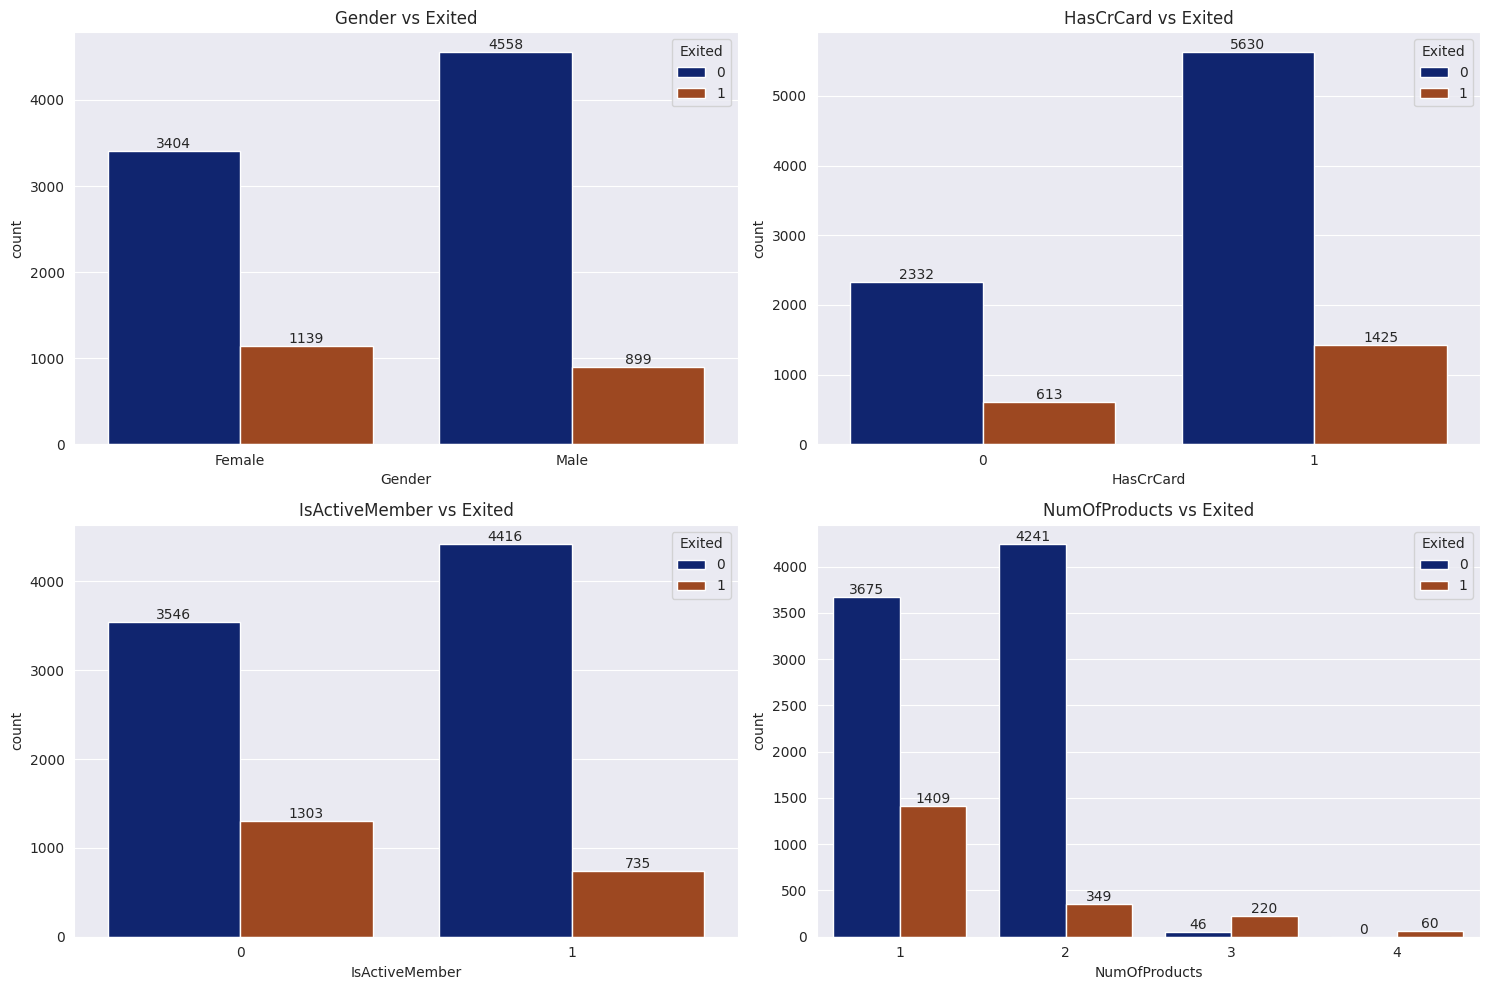

In [9]:
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(15,10))

ax = sns.countplot(data=data,x='Gender',ax=axes[0,0],hue='Exited',palette='dark')
for bars in ax.containers:
    ax.bar_label(bars)
axes[0,0].set_title('Gender vs Exited')

ax = sns.countplot(data=data,x='HasCrCard',ax=axes[0,1],hue='Exited',palette='dark')
for bars in ax.containers:
    ax.bar_label(bars)
axes[0,1].set_title('HasCrCard vs Exited')

ax = sns.countplot(data=data,x='IsActiveMember',ax=axes[1,0],hue='Exited',palette='dark')
for bars in ax.containers:
    ax.bar_label(bars)
axes[1,0].set_title('IsActiveMember vs Exited')

ax = sns.countplot(data=data,x='NumOfProducts',ax=axes[1,1],hue='Exited',palette='dark')
for bars in ax.containers:
    ax.bar_label(bars)
axes[1,1].set_title('NumOfProducts vs Exited')


plt.tight_layout()
plt.show()

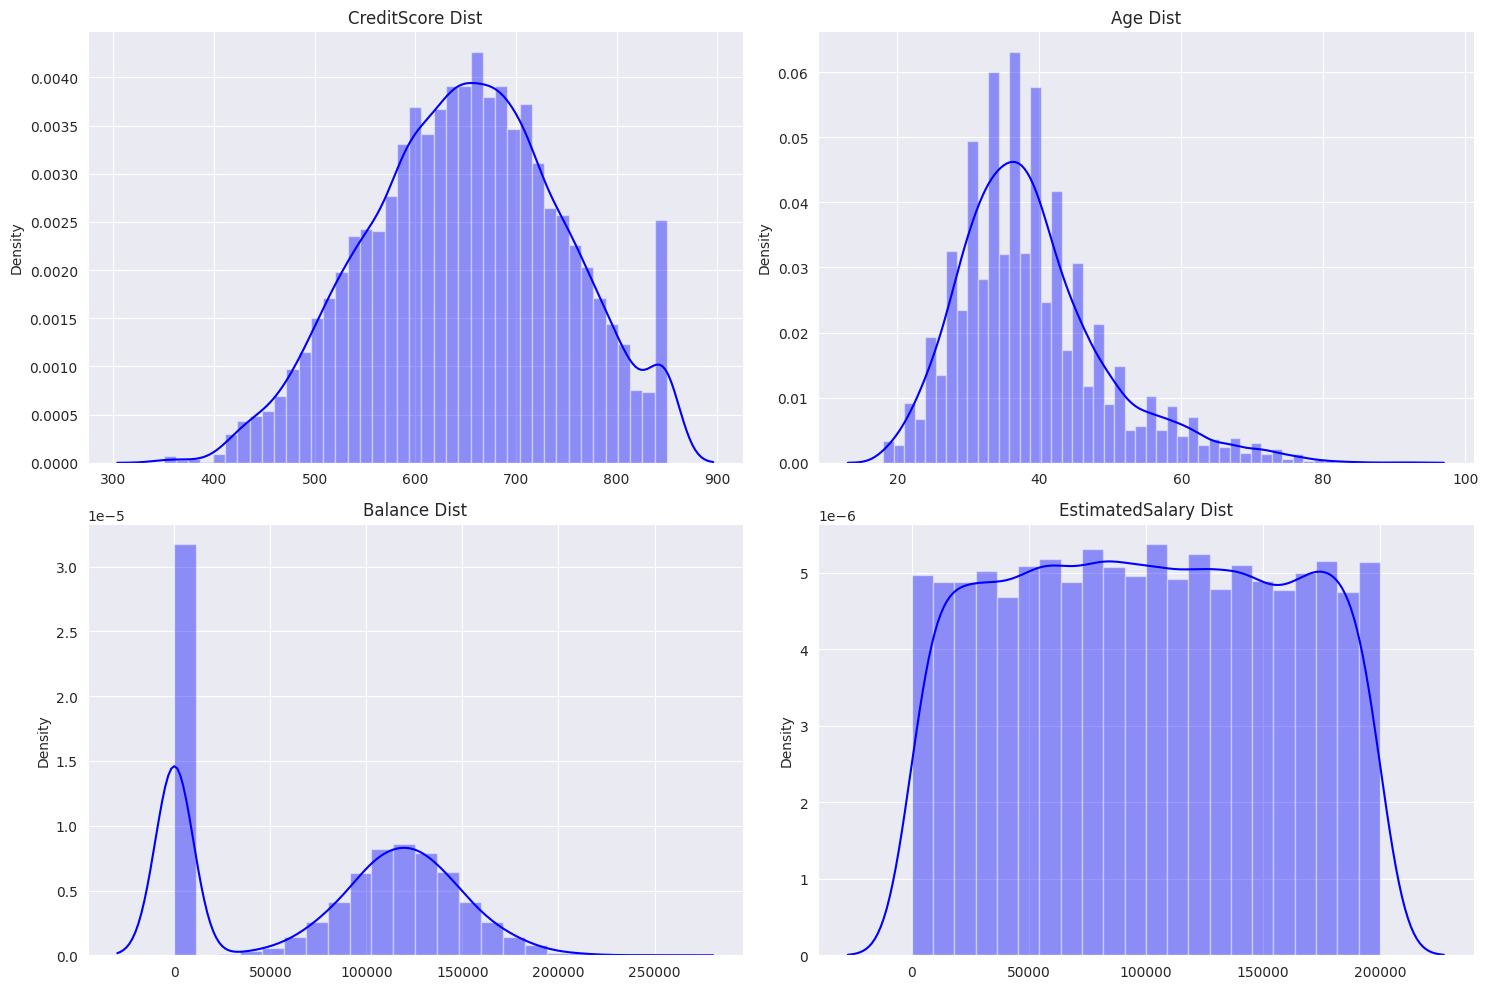

In [10]:
fig,axes = plt.subplots(nrows=2,ncols=2,figsize=(15,10))

sns.distplot(x=data['CreditScore'],ax=axes[0,0],color='blue')
axes[0,0].set_title('CreditScore Dist')

sns.distplot(x=data['Age'],ax=axes[0,1],color='blue')
axes[0,1].set_title('Age Dist')

sns.distplot(x=data['Balance'],ax=axes[1,0],color='blue')
axes[1,0].set_title('Balance Dist')

sns.distplot(x=data['EstimatedSalary'],ax=axes[1,1],color='blue')
axes[1,1].set_title('EstimatedSalary Dist')

plt.tight_layout()
plt.show()

In [11]:
data.drop(columns=['Geography'],inplace=True)

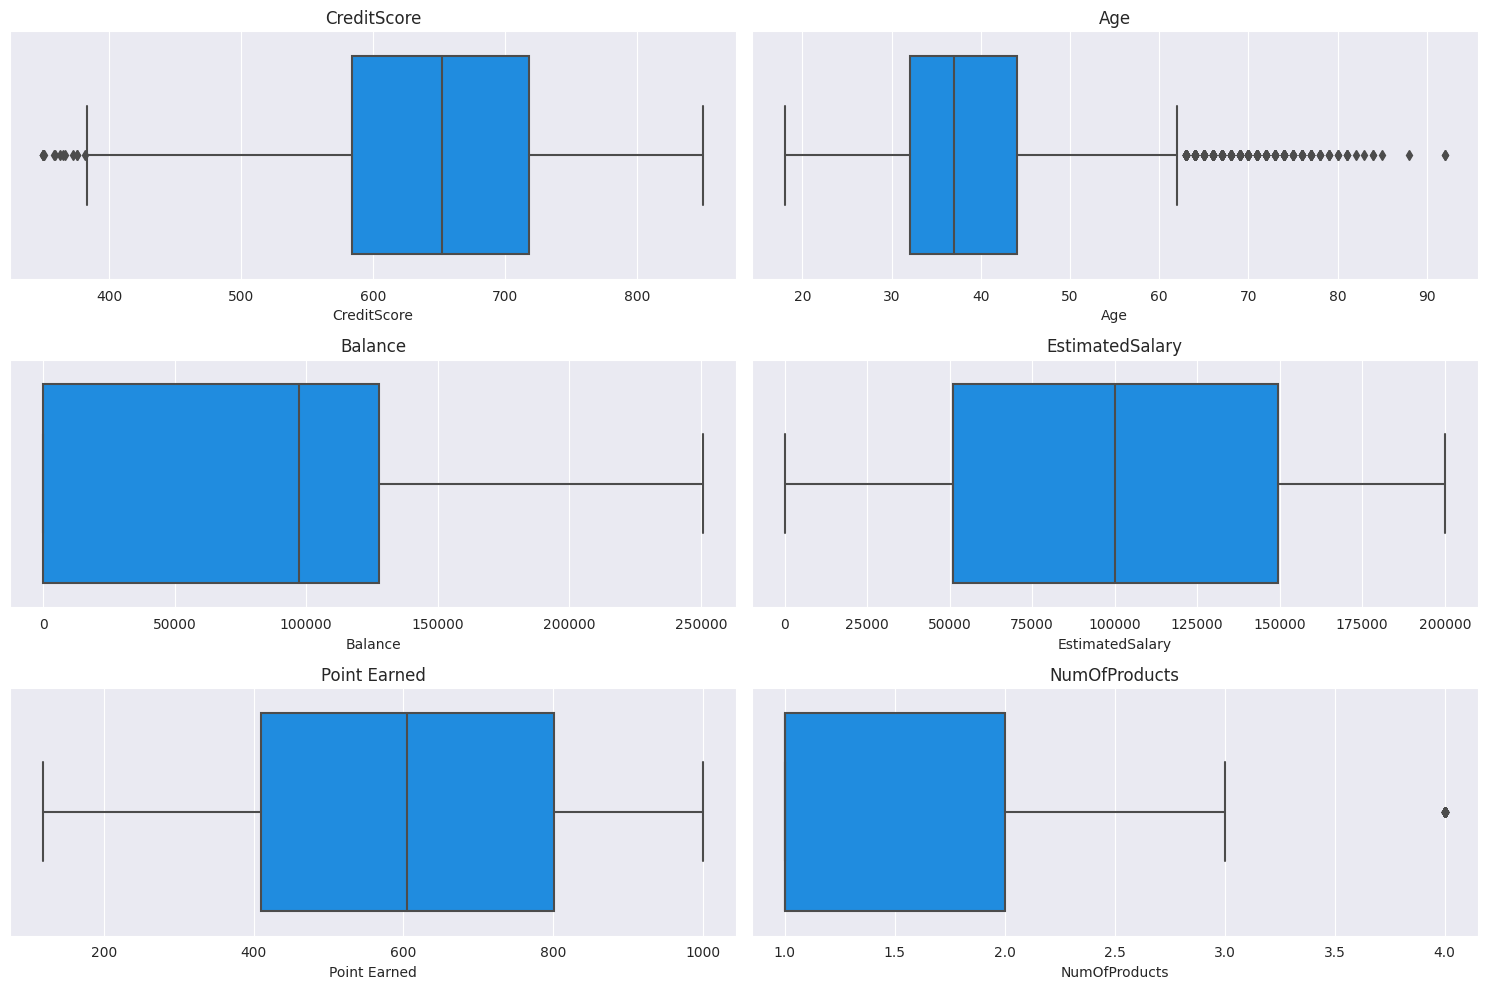

In [12]:
fig,axes = plt.subplots(nrows=3,ncols=2,figsize=(15,10))

sns.boxplot(x=data['CreditScore'],ax=axes[0,0],color='#0090FF')
axes[0,0].set_title('CreditScore')

sns.boxplot(x=data['Age'],ax=axes[0,1],color='#0090FF')
axes[0,1].set_title('Age')

sns.boxplot(x=data['Balance'],ax=axes[1,0],color='#0090FF')
axes[1,0].set_title('Balance')

sns.boxplot(x=data['EstimatedSalary'],ax=axes[1,1],color='#0090FF')
axes[1,1].set_title('EstimatedSalary')


sns.boxplot(x=data['Point Earned'],ax=axes[2,0],color='#0090FF')
axes[2,0].set_title('Point Earned')

sns.boxplot(x=data['NumOfProducts'],ax=axes[2,1],color='#0090FF')
axes[2,1].set_title('NumOfProducts')

plt.tight_layout()
plt.show()

# Remove Outlier

In [13]:
outlier = data.query('Age > 60')
data = data.drop(outlier.index,axis=0)

In [14]:
# data['total_bal'] = data['Balance'] + data['EstimatedSalary']
# data.drop(columns=['Balance','EstimatedSalary'],axis=1,inplace=True)

# Q1, Q3 = np.percentile(data['Balance'],[25,75])
# # print(Q1,Q3)
# IQR = Q1-Q3
# lower_fence = Q1 - 1.5*(IQR)
# higher_fence = Q3 + 1.5*(IQR)
# print(lower_fence, higher_fence)
# data[(data['Balance'] < higher_fence) & (data['Balance'] > lower_fence)]
# data.describe()
# max_limit = data.CreditScore.mean() + 3 * data.CreditScore.std()
# low_limit = data.CreditScore.mean() - 3 * data.CreditScore.std()
# max_limit, low_limit
# data[(data['CreditScore'] < max_limit) | (data['CreditScore'] > low_limit)]

In [15]:
data.sample(3)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
5142,719,Female,48,5,0.00,2,0,0,78563.66,0,0,4,GOLD,922
6952,659,Female,37,1,151105.68,1,1,1,140934.57,0,0,5,SILVER,781
3670,850,Male,28,4,0.00,2,1,1,12409.01,0,0,5,GOLD,242


In [16]:
data.select_dtypes('object').columns

Index(['Gender', 'Card Type'], dtype='object')

In [17]:
features = data.drop(columns=['Exited'])
target = data['Exited']

# Split Data

In [18]:
X_train,X_test,y_train,y_test = train_test_split(features,target,test_size=0.2,random_state=2)

In [19]:
data['Card Type'].unique()

array(['DIAMOND', 'GOLD', 'SILVER', 'PLATINUM'], dtype=object)

# Encoding

In [20]:
trf1 = ColumnTransformer([
    ('oe_cardtype',OrdinalEncoder(categories=[['SILVER','GOLD','PLATINUM','DIAMOND']]), [11]),
    ('ohe', OneHotEncoder(dtype='int'),[1]),
],remainder='passthrough')

# Scaling

In [21]:
trf2 = ColumnTransformer([
    ('scaling',StandardScaler(),slice(0,19))
])

# Model Selection

In [22]:
trf3 = LogisticRegression() 

# Pipeline

In [23]:
pipe = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3)
])

In [24]:
pipe.named_steps

{'trf1': ColumnTransformer(remainder='passthrough',
                   transformers=[('oe_cardtype',
                                  OrdinalEncoder(categories=[['SILVER', 'GOLD',
                                                              'PLATINUM',
                                                              'DIAMOND']]),
                                  [11]),
                                 ('ohe', OneHotEncoder(dtype='int'), [1])]),
 'trf2': ColumnTransformer(transformers=[('scaling', StandardScaler(),
                                  slice(0, 19, None))]),
 'trf3': LogisticRegression()}

In [25]:
# fit the data into pipeline
pipe.fit(X_train,y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('oe_cardtype',
                                                  OrdinalEncoder(categories=[['SILVER',
                                                                              'GOLD',
                                                                              'PLATINUM',
                                                                              'DIAMOND']]),
                                                  [11]),
                                                 ('ohe',
                                                  OneHotEncoder(dtype='int'),
                                                  [1])])),
                ('trf2',
                 ColumnTransformer(transformers=[('scaling', StandardScaler(),
                                                  slice(0, 19, None))])),
                ('trf3', LogisticRegression())])

In [26]:
# make predication and calculate accuracy score
y_pred = pipe.predict(X_test)
accuracy_score(y_test,y_pred)

0.9979035639412998

In [27]:
# cross validation
cross_val_score(pipe,X_train,y_train,cv=5,scoring='accuracy').mean()

0.9986892121264207

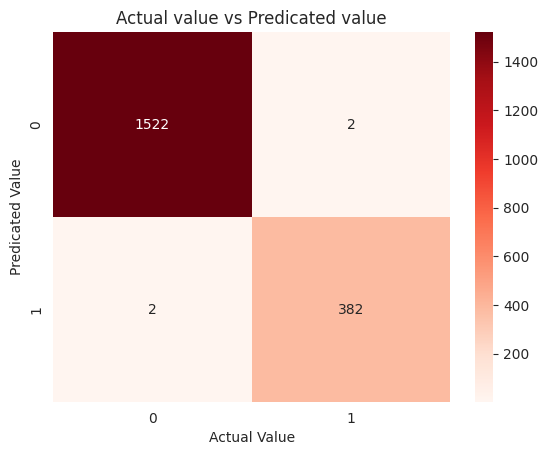

In [28]:
# confustion matrix
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cmap='Reds')
plt.title('Actual value vs Predicated value')
plt.xlabel('Actual Value')
plt.ylabel('Predicated Value')
plt.show()